![Abdessamd Touzani](banner.png)

In [1]:
import pandas as pd
import numpy as np


# set seed for reproducibility
np.random.seed(0)

print("Checked")

Checked


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
print('Checked...')

Checked...


**[Documentation for used Data](https://www.kaggle.com/datasets/saurograndi/airplane-crashes-since-1908)**

## **Import Data**

In [3]:
df = pd.read_csv('Airplane_Crashes_and_Fatalities_Since_1908.csv', encoding='ISO-8859-1')
print('Data read successfully')

Data read successfully


In [4]:
df.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


## **I) Data Cleaning && EDA:**

### 1) **Handle duplicates:**

In [5]:
df.duplicated().sum()

0

### 2) **Remove unnecessary columns:**

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5268 entries, 0 to 5267
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          5268 non-null   object 
 1   Time          3049 non-null   object 
 2   Location      5248 non-null   object 
 3   Operator      5250 non-null   object 
 4   Flight #      1069 non-null   object 
 5   Route         3561 non-null   object 
 6   Type          5241 non-null   object 
 7   Registration  4933 non-null   object 
 8   cn/In         4040 non-null   object 
 9   Aboard        5246 non-null   float64
 10  Fatalities    5256 non-null   float64
 11  Ground        5246 non-null   float64
 12  Summary       4878 non-null   object 
dtypes: float64(3), object(10)
memory usage: 535.2+ KB


In [7]:
df = df.drop(columns=['Time', 'Flight #', 'Registration', 'cn/In'])
df.head(5)

,Date,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,"Victoria, British Columbia, Canada",Private,NaN,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,Over the North Sea,Military - German Navy,NaN,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,"Near Johannisthal, Germany",Military - German Navy,NaN,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


--> Columns are dropped successfuly

### 3) **Handle missing values:**

In [8]:
df.isnull().sum()

Date             0
Location        20
Operator        18
Route         1707
Type            27
Aboard          22
Fatalities      12
Ground          22
Summary        390
dtype: int64

In [9]:
df.shape

(5268, 9)

Now, I will group data into 2 categories, continuous attributes that I will replace by the mean, and categorical attributes tht I will replace by the most frequence value.

- Continuous attributes:
  - Aboard
  - Fatalities
  - Ground
- Categorical attributes:
  - Location
  - Operator
  - Route
  - Type
  - Summary

- **There is no null values for Date**
- #### **Crashes are not strongly relatable with a specific time of the day, even tho it still can, in seasons like Falls and Winter...**
--
- 
  - *Forward Fill (ffill()) or Backward Fill (bfill())*
  - *Linear Interpolation*

### *for continuous attributes:*

In [10]:
#Aboard
#Calculate mean of Aboard
aboard_mean = df['Aboard'].mean()
#Replace NaN with the mean - import numpy for it
df['Aboard'].replace(np.NaN, aboard_mean, inplace = True)
print("Aboard null values: ", df['Aboard'].isnull().sum())

Aboard null values:  0


C:\Users\oo\AppData\Local\Temp\ipykernel_15328\2184457946.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Aboard'].replace(np.NaN, aboard_mean, inplace = True)


In [11]:
#Fatalities
fatalities_mean = df['Fatalities'].mean()
df['Fatalities'].replace(np.NaN, fatalities_mean, inplace = True)
print("Fatalities null values: ", df['Fatalities'].isnull().sum())

Fatalities null values:  0


C:\Users\oo\AppData\Local\Temp\ipykernel_15328\4202733177.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Fatalities'].replace(np.NaN, fatalities_mean, inplace = True)


In [12]:
#Ground
ground_mean = df['Ground'].mean()
df['Ground'].replace(np.NaN, ground_mean, inplace = True)
print("Ground null values: ", df['Ground'].isnull().sum())

Ground null values:  0


C:\Users\oo\AppData\Local\Temp\ipykernel_15328\2287460621.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Ground'].replace(np.NaN, ground_mean, inplace = True)


### *for categorical attributes:*

In [13]:
#Location
#Calculate most frequent value
print("Location null values: ", df['Location'].isnull().sum())
location_maxFreq = df['Location'].mode()[0]
#Replace NaN with the mean - import numpy for it
df['Location'].fillna(value=location_maxFreq, inplace=True)
print("Location null values: ", df['Location'].isnull().sum())

Location null values:  20
Location null values:  0


C:\Users\oo\AppData\Local\Temp\ipykernel_15328\2519789998.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Location'].fillna(value=location_maxFreq, inplace=True)


In [14]:
#Operator
print("Operator null values: ", df['Operator'].isnull().sum())
operator_maxFreq = df['Operator'].mode()[0]
df['Operator'].fillna(value=operator_maxFreq, inplace=True)
print("Operator null values: ", df['Operator'].isnull().sum())

Operator null values:  18
Operator null values:  0


C:\Users\oo\AppData\Local\Temp\ipykernel_15328\1632895995.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Operator'].fillna(value=operator_maxFreq, inplace=True)


In [15]:
#Route
print("Route null values: ", df['Route'].isnull().sum())
route_maxFreq = df['Route'].mode()[0]
print(route_maxFreq)
df['Route'].fillna(value=route_maxFreq, inplace=True)
print("Route null values: ", df['Route'].isnull().sum())

Route null values:  1707
Training
Route null values:  0


C:\Users\oo\AppData\Local\Temp\ipykernel_15328\3434967214.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Route'].fillna(value=route_maxFreq, inplace=True)


In [16]:
#AC Type
print("Type null values: ", df['Type'].isnull().sum())
ACType_maxFreq = df['Type'].mode()[0]
print("Frequent value: ",ACType_maxFreq)
df['Type'].fillna(value=ACType_maxFreq, inplace=True)
print("Type null values: ", df['Type'].isnull().sum())

Type null values:  27
Frequent value:  Douglas DC-3
Type null values:  0


C:\Users\oo\AppData\Local\Temp\ipykernel_15328\3869720396.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Type'].fillna(value=ACType_maxFreq, inplace=True)


In [17]:
df['Summary'].isnull().sum()

390

In [18]:
df['Summary'].mode()[0]

'Crashed during takeoff.'

In [19]:
#Summary
#From previous line, the most frequent value looks better than keeping the null data
print("Summary null values: ", df['Summary'].isnull().sum())
summary_maxFreq = df['Summary'].mode()[0]
# print("Frequent value: ",CnLn_maxFreq)
df['Summary'].fillna(value=summary_maxFreq, inplace=True)
print("Summary null values: ", df['Summary'].isnull().sum())

Summary null values:  390
Summary null values:  0


C:\Users\oo\AppData\Local\Temp\ipykernel_15328\3618811021.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Summary'].fillna(value=summary_maxFreq, inplace=True)


In [20]:
df.isnull().sum()

Date          0
Location      0
Operator      0
Route         0
Type          0
Aboard        0
Fatalities    0
Ground        0
Summary       0
dtype: int64

### 4) **Detect && Remove outliers:**

In [21]:
df.describe()

,Aboard,Fatalities,Ground
count,5268.000000,5268.000000,5268.000000
mean,27.554518,20.068303,1.608845
std,42.986652,33.162110,53.874957
min,0.000000,0.000000,0.000000
25%,5.000000,3.000000,0.000000
50%,13.000000,9.000000,0.000000
75%,30.000000,23.000000,0.000000
max,644.000000,583.000000,2750.000000


In [22]:
import seaborn as sns

C:\Users\oo\AppData\Local\Temp\ipykernel_15328\3571435636.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Aboard'])
C:\Users\oo\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Aboard', ylabel='Density'>

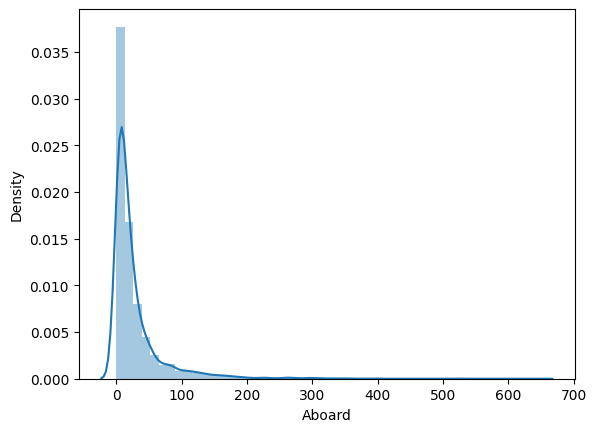

In [23]:
sns.distplot(df['Aboard'])

<Axes: >

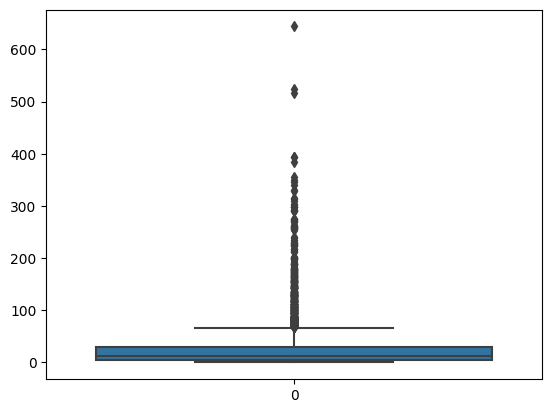

In [24]:
sns.boxplot(df['Aboard'])

It's cleaar that we have an outlier here, so let's try to remove it using z-score

In [25]:
df['z_score'] = (df['Aboard'] - df['Aboard'].mean()) / df['Aboard'].std()

# Find outliers (threshold: Z-score > 3 or Z-score < -3)
outliers = df[(df['z_score'] > 3) | (df['z_score'] < -3)]
print("Outliers:")
# print(outliers) #uncomment to see

Outliers:


In [26]:
cleaned_outliers_df = df.drop(outliers.index)
print("Original DataFrame's shape:")
print(df.shape)
print("\nDataFrame after removing outliers shape:")
print(cleaned_outliers_df.shape)

Original DataFrame's shape:
(5268, 10)

DataFrame after removing outliers shape:
(5152, 10)


<Axes: >

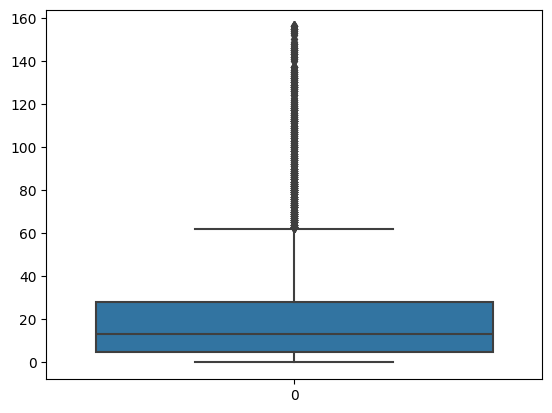

In [27]:
sns.boxplot(cleaned_outliers_df['Aboard'])

--> The outliers haas been removed...we do the same for the other coolumns

<Axes: >

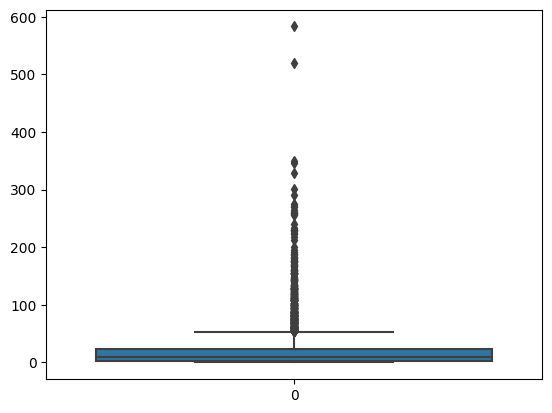

In [28]:
#Fatalities
sns.boxplot(df['Fatalities'])

<Axes: >

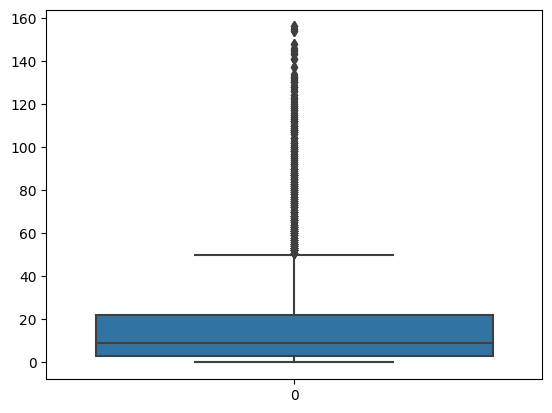

In [29]:
#Fatalities
sns.boxplot(cleaned_outliers_df['Fatalities'])

<Axes: >

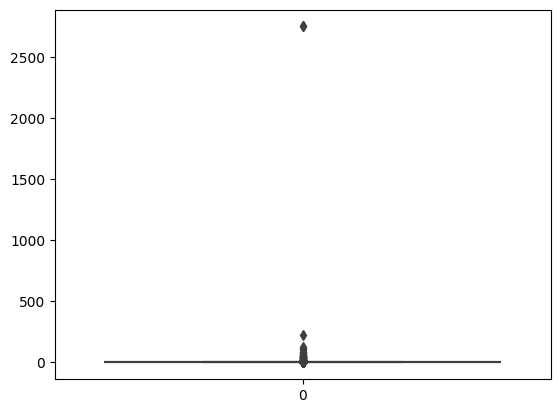

In [30]:
#Ground
sns.boxplot(df['Ground'])

<Axes: >

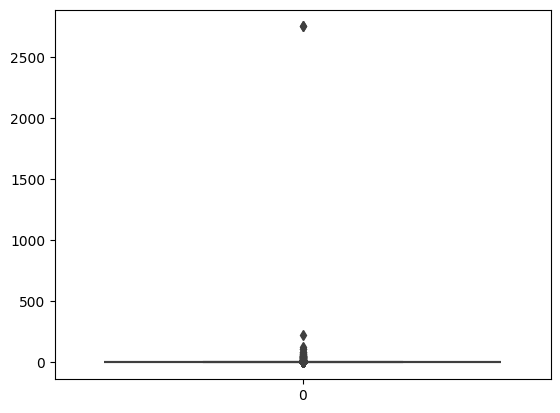

In [31]:
#Ground
sns.boxplot(cleaned_outliers_df['Ground'])

In [32]:
cleaned_outliers_df['z_score'] = (cleaned_outliers_df['Ground'] - cleaned_outliers_df['Ground'].mean()) / cleaned_outliers_df['Ground'].std()

# Find outliers (threshold: Z-score > 3 or Z-score < -3)
outliers = cleaned_outliers_df[(cleaned_outliers_df['z_score'] > 3) | (cleaned_outliers_df['z_score'] < -3)]
print("Outliers:")
# print(outliers) #uncomment to see
cleaned_outliers_dff = cleaned_outliers_df.drop(outliers.index)
print("Original DataFrame's shape:")
print(cleaned_outliers_df.shape)
print("\nDataFrame after removing outliers shape:")
print(cleaned_outliers_dff.shape)

Outliers:
Original DataFrame's shape:
(5152, 10)

DataFrame after removing outliers shape:
(5149, 10)


<Axes: >

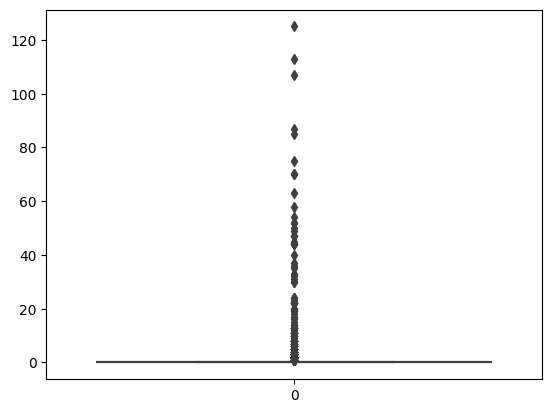

In [33]:
#Ground
sns.boxplot(cleaned_outliers_dff['Ground'])

In [34]:
cleaned_outliers_dff.describe()

,Aboard,Fatalities,Ground,z_score
count,5149.000000,5149.000000,5149.000000,5149.000000
mean,22.939833,17.579883,0.524645,-0.020392
std,27.950526,23.593153,4.902659,0.089995
min,0.000000,0.000000,0.000000,-0.030023
25%,5.000000,3.000000,0.000000,-0.030023
50%,13.000000,9.000000,0.000000,-0.030023
75%,28.000000,22.000000,0.000000,-0.030023
max,156.000000,156.000000,125.000000,2.264512


### 4) **Standardizing data structure and types:**

In [35]:
#not using copy, so both variables will point to the same data.
dff = cleaned_outliers_dff

In [36]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5149 entries, 0 to 5267
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        5149 non-null   object 
 1   Location    5149 non-null   object 
 2   Operator    5149 non-null   object 
 3   Route       5149 non-null   object 
 4   Type        5149 non-null   object 
 5   Aboard      5149 non-null   float64
 6   Fatalities  5149 non-null   float64
 7   Ground      5149 non-null   float64
 8   Summary     5149 non-null   object 
 9   z_score     5149 non-null   float64
dtypes: float64(4), object(6)
memory usage: 571.5+ KB


In [37]:
dff.head()

,Date,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary,z_score
0,09/17/1908,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",-0.030023
1,07/12/1912,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,-0.030023
2,08/06/1913,"Victoria, British Columbia, Canada",Private,Training,Curtiss seaplane,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...,-0.030023
3,09/09/1913,Over the North Sea,Military - German Navy,Training,Zeppelin L-1 (airship),20.0,14.0,0.0,The airship flew into a thunderstorm and encou...,-0.030023
4,10/17/1913,"Near Johannisthal, Germany",Military - German Navy,Training,Zeppelin L-2 (airship),30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...,-0.030023


In [38]:
dff['Date'] = pd.to_datetime(dff['Date'], errors='coerce')
dff.head(2)

,Date,Location,Operator,Route,Type,Aboard,Fatalities,Ground,Summary,z_score
0,1908-09-17,"Fort Myer, Virginia",Military - U.S. Army,Demonstration,Wright Flyer III,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly...",-0.030023
1,1912-07-12,"AtlantiCity, New Jersey",Military - U.S. Navy,Test flight,Dirigible,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...,-0.030023


In [39]:
dff['Aboard'] = dff['Aboard'].astype(int)
dff['Fatalities'] = dff['Fatalities'].astype(int)
dff['Ground'] = dff['Ground'].astype(int)

In [40]:
dff.dtypes

Date          datetime64[ns]
Location              object
Operator              object
Route                 object
Type                  object
Aboard                 int32
Fatalities             int32
Ground                 int32
Summary               object
z_score              float64
dtype: object

### 5) **Check for and handle duplicate entries:**

In [41]:
dff.duplicated().sum()

0

As we see, there is no duplicated values, so **Data Cleaning** is *done*

**In this analysis, instead of opting for traditional exploratory data analysis (EDA) techniques or extensive data visualization, I utilized the power of `ydata profiling` to gain insights into the cleaned dataset. `ydata profiling` offers a comprehensive overview of the data characteristics, including summary statistics, data types, missing values, and unique values within each column. By leveraging automated profiling techniques from `ydata`, I was able to efficiently identify potential data quality issues, understand the data distribution, and unveil patterns and anomalies. This approach not only provided valuable insights into the dataset but also streamlined the analysis process, allowing for quicker decision-making and a deeper understanding of the underlying data structure.**

In [42]:
from ydata_profiling import ProfileReport
from ydata_profiling.utils.cache import cache_file
report=ProfileReport(dff,title="Airplane Crashes Since 1908 by Abdessamad Touzani", explorative=True)
report.to_file("data_exploration.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\oo\AppData\Local\Programs\Python\Python311\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
C:\Users\oo\AppData\Local\Programs\Python\Python311\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0 0 0 ... 0 0 0]' has dtype incompatible with int32, please explicitly cast to a compatible dtype first.
  discretized_df.loc[:, column] = self._discretize_column(
C:\Users\oo\AppData\Local\Programs\Python\Python311\Lib\site-packages\ydata_profiling\model\pandas\discretize_pandas.py:52: FutureWarning: Setting an item of incompatible dtype is deprec

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## **By: [Abdessamad Touzani](https://www.linkedin.com/in/abdessamadtouzani/)**